In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples = 100 , n_features = 1 , n_informative = 1 , n_targets = 1 , noise=20)

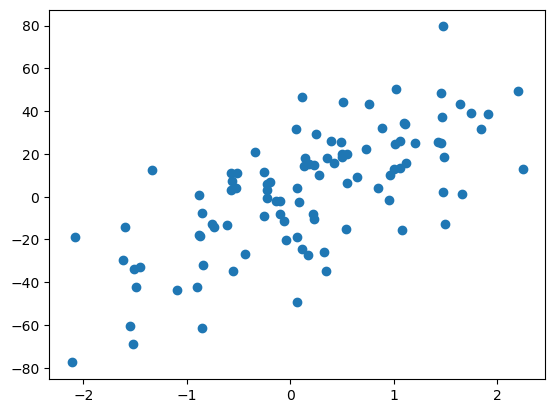

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X,y)

LinearRegression()

In [7]:
print(lr.coef_)
print(lr.intercept_)

[20.13711614]
-0.7620567018880826


In [8]:
m = 15.75

In [9]:
class GDRegressor :
    def __init__(self , learning_rate , epochs):
        self.m = 35
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs
        
        
    def model_fit(self, X,y) :
        # Calculate the b using Gradient Descent
        
        for i in range(self.epochs):
            loss_intercept = -2*np.sum(y - self.m*X.ravel()-self.b)
            self.b = self.b - (self.lr * loss_intercept)
            
        print(self.b)           

In [10]:
grow = GDRegressor(0.001 , 100)

In [11]:
grow.model_fit(X,y)

-3.427885211993407


# now this time to check both on m and b

In [12]:
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import cross_val_score

In [13]:
X,y = make_regression(n_samples = 100 , n_features = 1 ,
                      n_informative = 1 , n_targets = 1 , noise = 20 , random_state = 13)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.2 ,random_state=34)

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train , y_train)
print(lr.coef_)
print(lr.intercept_)

[29.44646987]
-3.986403271797774


In [18]:
y_pred = lr.predict(X_test)


In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_test , y_pred)

0.01952429644474296

In [21]:
class GDRegressor :
    def __init__(self, lr , epochs):
        self.m = -2
        self.b = 90
        self.lr = lr
        self.epochs = epochs
        
    def fit_model(self, X,y):
        
        for i in range(self.epochs):
            loss_intercept_b = -2*np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_intercept_b ) 
            
            loss_slope_m = -2*np.sum((y - self.m*X.ravel() - self.b)* X.ravel())
            self.m = self.m - (self.lr * loss_slope_m)
            
            
        print(self.b , self.m)
        
        
    def predict(self , X):
        return self.m * X + self.b
            

In [22]:
gd = GDRegressor(0.001, 100)

In [23]:
gd.fit_model(X_train , y_train)

-3.986402063866622 29.44646347359889


In [24]:
y_pred = gd.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

r2_score(y_test , y_pred)

0.019524562968750492